In [1]:
import numpy as np
import pandas as pd

In [5]:
df_regions = pd.read_csv('https://raw.githubusercontent.com/ilovedata6/olympics/main/noc_regions.csv')

df_regions.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [ ]:
url= "https://raw.githubusercontent.com/ilovedata6/olympics/main/athlete.events.csv"
df = pd.read_csv(url)

df.head(3)

**As i am only doing analysis of the Summer Olympics so I'll filter out the entries of Winter olypmics**

In [4]:
df = df[df['Season'] == 'Summer']

In [5]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Column Name | Description
------------|--------------
ID | Unique number for each athlete
Name | Name of the athlete
Sex | Gender M or F
Age | Age of the athlete
Height | Height of the athlete
Weight | Weight of the athlete
Team | Team name
NOC | National Olympic Committee 3-letter code
Games | Year and season
Year | Year of the Olympics games
Season | Season of the Olympics games
City | Host city
Sport | Sport Name
Event | Categories of Events
Medal | Gold, Silver, Bronze, or NA
Region | Name of the country


In [6]:
# Merging the two datasets to get Name of the countries
df = df.merge(df_regions,on='NOC',how='left')
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [7]:
# Checking for Null Values
null_values = (df.isnull().sum()/df.shape[0])*100
print('\tPercentage of Null Values in Each Column \n\n',null_values)

	Percentage of Null Values in Each Column 

 ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.128923
Height    23.301071
Weight    24.198390
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     84.683130
region     0.166253
notes     98.022485
dtype: float64


In [8]:
df.duplicated().sum()

1385

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


Now we tally the number of medals won by each country in the Summer Olympics.

In [12]:
medals = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medals.shape

(105636, 20)

In [13]:
medal_tally = medals.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']


In [14]:
medal_tally[['Total','Gold','Silver','Bronze']]=medal_tally[['Total','Gold','Silver','Bronze']].astype('int')

In [15]:
years = df['Year'].unique().tolist()

In [16]:
years.sort()

In [17]:
years.insert(0,'OverAll')

In [18]:
country=np.unique(df['region'].dropna().values).tolist()

In [19]:
country.sort()

In [20]:
country.insert(0,'OverAll')

In [21]:
def fetch_medal_tally(df,year,country):
    
    flag=0
    
    medals = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport', 'Event','Medal'])
    
    if year == 'OverAll' and country == 'OverAll':
        temp_df = medals
    elif (year !='OverAll') and (country == 'OverAll'):
        temp_df = medals[medals['Year']==int(year)]
    elif (year == 'OverAll') and (country != 'OverAll'):
        flag=1
        temp_df = medals[medals['region']==country]
    elif (year != 'OverAll') and (country != 'OverAll'):
        temp_df = medals[(medals['Year']==int(year)) & (medals['region']==country)]
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()    
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    x[['Total','Gold','Silver','Bronze']]=x[['Total','Gold','Silver','Bronze']].astype('int')
    
    return x

### OverAll Analysis

 * No.of Editions
 * No.of Cities
 * No.of Events/Sports
 * No.of Athletes
 * No.of Participating Countries
 * No.of Medals
 * Events Played Over the Years
 * Athletes Participated Over the Years
 * Participating countries Over the Years
 * No.of Events/Sports Over the Years
 * Most Successful Athletes


In [22]:
no_of_editions = df['Year'].unique().shape[0]-1 #Subtracting 1 because Olympics 1906 was Nullified
no_of_cities = df['City'].unique().shape[0] #No. of Cities
no_of_sports = df['Sport'].unique().shape[0] # No. of Sports Played in Olympics
no_of_events = df['Event'].unique().shape[0] # No. of Events 
No_of_athletes = df['Name'].unique().shape[0] # No. of athletes 
no_of_countries = df['region'].unique().shape[0] # No. of Countries participated

In [26]:
!pip install plotly

In [29]:
# Plotting a Line graph of Participating nations over the year

import plotly.express as px

nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time.rename(columns={'index':'Year','Year':'No_of_countries'},inplace=True)

fig = px.line(nations_over_time,x='Year',y='No_of_countries')
fig.show()

In [30]:
# Plotting Number of events over time

events_over_years = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')
events_over_years.rename(columns={'index':'Year','Year':'Events'},inplace=True)

fig = px.line(events_over_years,x='Year',y='Events')
fig.show()

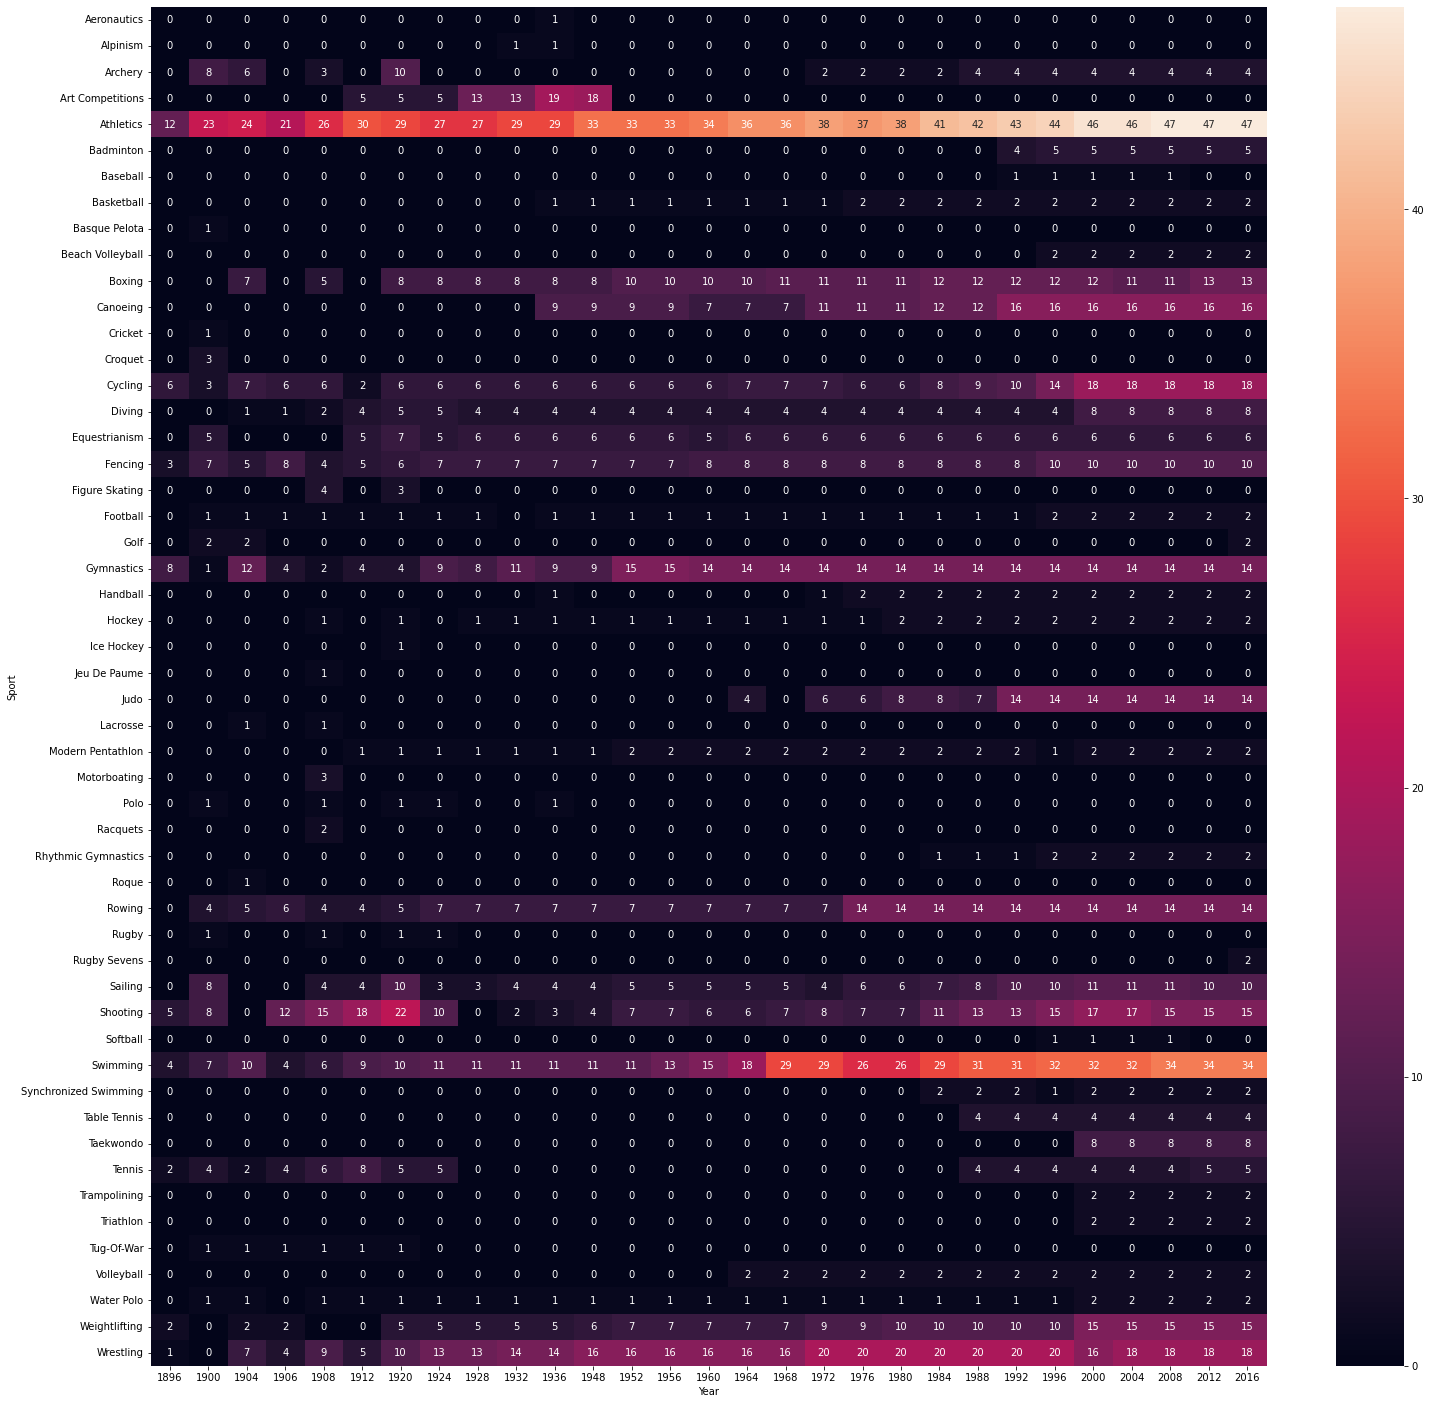

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

x = df.drop_duplicates(['Year','Sport','Event'])

plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index = 'Sport' , columns = 'Year' , values = 'Event', aggfunc='count').fillna(0).astype(int),annot=True)
plt.show()

In [31]:
def athlete_success(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'OverAll':
        temp_df = temp_df[temp_df['Sport']==sport]
    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates()
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [34]:
athlete_success(df,'OverAll')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
129,Takashi Ono,13,Judo,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA


### Country Wise Analysis

* Countrywise Medal tally per year
* What countries are Good at Heatmap
* Most successfull Athletes (Top 10)

In [ ]:
# Country-wise medal tally per year

temp_df = df.copy()
temp_df = temp_df.dropna(subset=['Medal'])

In [ ]:
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])


In [ ]:
new_df = temp_df[temp_df['region']=='Belgium']
final_df = new_df.groupby(['Year']).count()['Medal'].reset_index()
final_df.head(3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='Year',y='Medal',data=final_df)

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count'))
plt.show()

In [ ]:
new_df = temp_df[temp_df['region']=='USA']
final_df = new_df.groupby(['Name','Sport']).count()['Medal'].reset_index().sort_values('Medal',ascending=False)
final_df.head(10)  

### Athlete wise Analysis

In [ ]:
import plotly.figure_factory as ff

In [ ]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']== 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']== 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']== 'Bronze']['Age'].dropna()

In [ ]:
athlete_df = df.drop_duplicates(['Name','region'])
fig = ff.create_distplot([x1,x2,x3,x4],['Over All Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [ ]:
b=[]
tempdf1=athlete_df[athlete_df['Sport']=='Cricket']
a = temp_df1[temp_df1['Medal']=='Gold']['Age'].dropna()
b.append(a)
print(b)

In [ ]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

In [ ]:
temp_df = athlete_df[athlete_df['Sport']=='Athletics']

plt.figure(figsize=(10,10))
sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'])
plt.show()

In [ ]:
import plotly.express as px
men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()
final = men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
fig=px.line(final,x='Year',y=['Male','Female'])
fig.show()